In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import datetime as dt

Building DataFrames for gold price and inflation for Europe/Germany: 

In [2]:
### Loading gold and inflation data from Kaggle:

df_gold = pd.read_csv('Data/gold_1.csv')

df_inf = pd.read_csv('Data/inflation.csv', skiprows=4)

In [3]:
### Rounding the numbers:
df_inf = df_inf.round(1)

### Setting country name as index:
df_inf = df_inf.set_index('Country Name')

In [4]:
### Building and manipulating inflation DataFrame for Germany:

df_inf_ger = df_inf.loc['Germany'].drop(labels=['Country Code', 'Indicator Name', 'Indicator Code'],axis=0)

df_inf_ger = pd.DataFrame({'': df_inf_ger.index, 'inflation for this year in %': df_inf_ger.values})

df_inf_ger = df_inf_ger.set_index('')

df_inf_ger = df_inf_ger.drop(['Unnamed: 66','2021'], axis='index')

In [41]:
df_inf_ger.head()

,inflation for this year in %,Inflation Faktor,year
,,,
1960,1.5,1.015,1960
1961,2.3,1.023,1961
1962,2.8,1.028,1962
1963,3,1.03,1963
1964,2.3,1.023,1964


Manipulating gold dataframe and extracting data for euro zone:

In [6]:
### Adding year/month/date columns:

df_gold['Date'] = pd.to_datetime(df_gold['Date'])

df_gold['months'] = df_gold['Date'].dt.month 

df_gold['year']  = df_gold['Date'].dt.year


### Building gold DatafFrame for Europe:

df_gold = df_gold.set_index('Date')

df_gold_eur = df_gold['Europe(EUR)']

df_gold_eur = pd.DataFrame({'': df_gold_eur.index, 'gold in eur per oz': df_gold_eur.values})

In [7]:
df_gold_eur.head()

,,gold in eur per oz
0,1979-01-31,144.8
1,1979-02-28,154.6
2,1979-03-30,148.0
3,1979-04-30,152.8
4,1979-05-31,172.0


In [8]:
df_inf_ger['Inflation Faktor'] = (100 + df_inf_ger['inflation for this year in %'])/100

df_gold_eur = df_gold_eur.set_index('')

df_gold_eur['year'] = df_gold_eur.index.year

columns_titles = ["year","gold in eur per oz"]
df_gold_eur = df_gold_eur.reindex(columns=columns_titles)




df_inf_ger['year'] = df_inf_ger.index.astype('int64')

df_gold_eur['date'] = df_gold_eur.index

In [9]:
df_new = pd.merge(df_gold_eur, df_inf_ger, on = 'year')

In [10]:
df_new.tail()

,year,gold in eur per oz,date,inflation for this year in %,Inflation Faktor
499,2020,1636.7,2020-08-31,0.5,1.005
500,2020,1609.1,2020-09-30,0.5,1.005
501,2020,1615.5,2020-10-30,0.5,1.005
502,2020,1473.5,2020-11-30,0.5,1.005
503,2020,1542.7,2020-12-31,0.5,1.005


In [11]:
years=list(set(df_new['year'].values))

In [12]:
df_new['month']=df_new['date'].dt.month

In [13]:
df_test=df_new[df_new['month']==12]

In [14]:
df_test = df_test[['year','gold in eur per oz','date','Inflation Faktor']].reset_index()

In [15]:
df_test.tail()

,index,year,gold in eur per oz,date,Inflation Faktor
37,455,2016,1086.4,2016-12-30,1.005
38,467,2017,1075.1,2017-12-29,1.015
39,479,2018,1118.8,2018-12-31,1.017
40,491,2019,1349.4,2019-12-31,1.014
41,503,2020,1542.7,2020-12-31,1.005


Entering two more years of data manually:

In [16]:
### Building an array with two more years of gold and inflation data:
array = np.array([[333,2021,1606.1,'2021-12-31',1.07],[333,2022,1699.1,'2022-12-30',1.092]])
### Converting array to df:
df_erg = pd.DataFrame(array,columns=['index','year','gold in eur per oz','date','Inflation Faktor'])
### Changing data type:
df_erg[['gold in eur per oz','Inflation Faktor']]=df_erg[['gold in eur per oz','Inflation Faktor']].astype('float')

In [17]:
### Merging the two DataFrames, i.e. entering two more years of data:
df=pd.concat([df_test,df_erg])
df=df.reset_index()
df=df.drop(columns=['level_0','index'])
df_test=df

Filling a list with inflation factors in order to multiply them easily, to calculate total inflation for several years:

In [18]:
### Calculating the inflation factor by multiplying the entries of the dataframe:

factor_list = []
for i in range(len(df_test[['Inflation Faktor']])):
    factor_list.append(df_test[['Inflation Faktor']].iloc[43-i:44-i])


list2=[]
for i in range(len(factor_list)+1):
    list2.append(factor_list[0:i])
    
    
list3=[]
for i in range(1,len(list2)):
    list3.append((2023-i,round(np.prod(list2[i]),3)))
    
    
    
    
df_long_fac = pd.DataFrame(list3)

df_long_fac = pd.DataFrame({'year': df_long_fac[0], 'inflation factor from given year to 2022': df_long_fac[1]})

In [19]:
df_test.tail()

,year,gold in eur per oz,date,Inflation Faktor
39,2018,1118.8,2018-12-31 00:00:00,1.017
40,2019,1349.4,2019-12-31 00:00:00,1.014
41,2020,1542.7,2020-12-31 00:00:00,1.005
42,2021,1606.1,2021-12-31,1.07
43,2022,1699.1,2022-12-30,1.092


In [20]:
### DataFrame manipulation:
df['date']=df['date'].astype('str')
df['date']=df['date'].str.slice(0,10)
df_test['year']=df_test['year'].astype('int')

Merging DataFrames and manipuating final DataFrame:

In [21]:
### Merging two DataFrames:
df_new2 = pd.merge(df_long_fac, df_test, on = 'year')

In [22]:
### Rearranging columns in DataFrame:
df_new2 = df_new2[['year','date','inflation factor from given year to 2022','gold in eur per oz','Inflation Faktor']]

In [23]:
df_new2.head()

,year,date,inflation factor from given year to 2022,gold in eur per oz,Inflation Faktor
0,2022,2022-12-30,1.092,1699.1,1.092
1,2021,2021-12-31,1.168,1606.1,1.07
2,2020,2020-12-31,1.174,1542.7,1.005
3,2019,2019-12-31,1.191,1349.4,1.014
4,2018,2018-12-31,1.211,1118.8,1.017


In [24]:
### Since we are interested for the view of 2020 we normalize inflation factors and reduce it for inflation in 2022:
df_new2['inflation factor from given year to 2022']=df_new2['inflation factor from given year to 2022']/1.092

In [25]:
### Calculating the historic gold price in todays money:
df_new2['gold price corrected for inflation']=df_new2['inflation factor from given year to 2022']*df_new2['gold in eur per oz']
df_new2['gold price corrected for inflation']=round(df_new2['gold price corrected for inflation'],2)

In [26]:
df_new2.head()

,year,date,inflation factor from given year to 2022,gold in eur per oz,Inflation Faktor,gold price corrected for inflation
0,2022,2022-12-30,1.000000,1699.1,1.092,1699.10
1,2021,2021-12-31,1.069597,1606.1,1.07,1717.88
2,2020,2020-12-31,1.075092,1542.7,1.005,1658.54
3,2019,2019-12-31,1.090659,1349.4,1.014,1471.74
4,2018,2018-12-31,1.108974,1118.8,1.017,1240.72


Plotting gold price vs inflation corrected price:

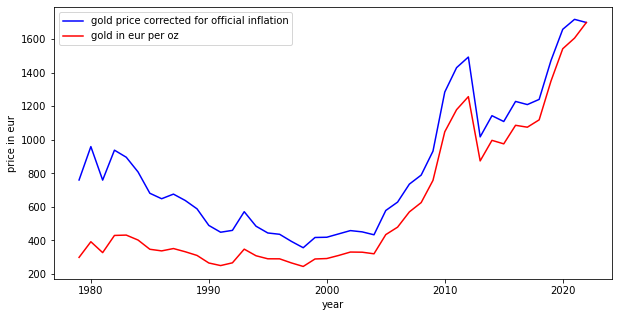

In [27]:
### Plotting gold price vs inflation corrected price:
plt.figure(figsize=(10,5))
plt.plot(df_new2['year'],df_new2['gold price corrected for inflation'],'b',label='gold price corrected for official inflation')
plt.plot(df_new2['year'],df_new2['gold in eur per oz'],'r',label='gold in eur per oz')
plt.xlabel('year')
plt.ylabel('price in eur')
plt.legend()

In [28]:
df_new2.head()

,year,date,inflation factor from given year to 2022,gold in eur per oz,Inflation Faktor,gold price corrected for inflation
0,2022,2022-12-30,1.000000,1699.1,1.092,1699.10
1,2021,2021-12-31,1.069597,1606.1,1.07,1717.88
2,2020,2020-12-31,1.075092,1542.7,1.005,1658.54
3,2019,2019-12-31,1.090659,1349.4,1.014,1471.74
4,2018,2018-12-31,1.108974,1118.8,1.017,1240.72


Adding 3% of "hidden" inflation since 1990:

In [29]:
### Adding 3% of "hidden" inflation for every year since 1990:
df_new2['unofficial inflation']=df_new2['Inflation Faktor']

for i in range(len(df_new2)):
    if df_new2['year'].iloc[i]<1990:
        df_new2['unofficial inflation'].iloc[i]=df_new2['Inflation Faktor'].iloc[i]
    else:
        df_new2['unofficial inflation'].iloc[i]=df_new2['Inflation Faktor'].iloc[i]+0.03

C:\Users\49174\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [30]:
df_new2.tail()

,year,date,inflation factor from given year to 2022,gold in eur per oz,Inflation Faktor,gold price corrected for inflation,unofficial inflation
39,1983,1983-12-30,2.074176,432.0,1.033,896.04,1.033
40,1982,1982-12-31,2.182234,429.9,1.052,938.14,1.052
41,1981,1981-12-31,2.319597,327.5,1.063,759.67,1.063
42,1980,1980-12-31,2.445055,392.4,1.054,959.44,1.054
43,1979,1979-12-31,2.542125,299.1,1.04,760.35,1.04


In [31]:
### Calculating the unofficial inflation factor for a given year until 2022 (same method as before):

factor_list_new = []

for i in range(len(df_new2[['unofficial inflation']])):
    factor_list_new.append(df_new2[['unofficial inflation']].iloc[i:1+i])



list2_new=[]

for i in range(len(factor_list_new)+1):
    list2_new.append(factor_list_new[0:i])

    
    
    
list3_new=[]

for i in range(1,len(list2_new)):
    list3_new.append((2023-i,round(np.prod(list2_new[i]),3)))
    
    
    
    
df_long_fac_new = pd.DataFrame(list3_new)

df_long_fac_new = pd.DataFrame({'year': df_long_fac_new[0], 'unofficial inflation factor from given year to 2022': df_long_fac_new[1]})

In [32]:
### Merging two DataFrames:
df_new3 = pd.merge(df_long_fac_new, df_new2, on = 'year')

In [33]:
### Since we are interested for the view of 2020 we normalize inflation factors and reduce it for inflation in 2022:
df_new3['unofficial inflation factor from given year to 2022']=df_new3['unofficial inflation factor from given year to 2022']/1.142

In [34]:
### Calculating the historic gold price in todays money:
df_new3['gold price corrected for unofficial inflation']=df_new3['unofficial inflation factor from given year to 2022']*df_new3['gold in eur per oz']
df_new3['gold price corrected for unofficial inflation']=round(df_new3['gold price corrected for unofficial inflation'],2)

Plotting the different gold prices:

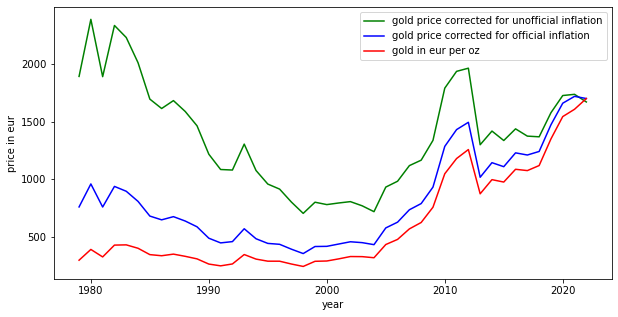

In [42]:
### Plotting the different prices for gold:
plt.figure(figsize=(10,5))
plt.plot(df_new3['year'],df_new3['gold price corrected for unofficial inflation'],'g',label='gold price corrected for unofficial inflation')
plt.plot(df_new3['year'],df_new3['gold price corrected for inflation'],'b',label='gold price corrected for official inflation')
plt.plot(df_new3['year'],df_new3['gold in eur per oz'],'r',label='gold in eur per oz')
plt.xlabel('year')
plt.ylabel('price in eur')
plt.legend()

plt.savefig('gold_price_corrected.png')

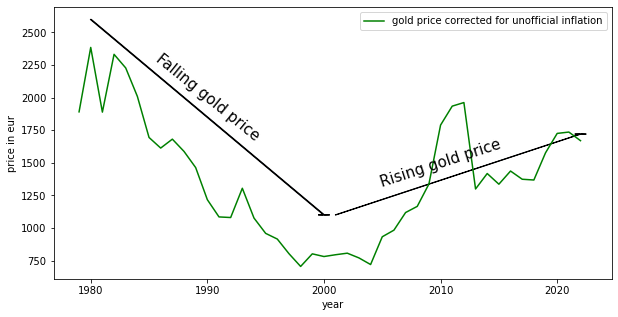

In [43]:
### Plotting gold price corrected for unofficial inflation:
plt.figure(figsize=(10,5))
plt.plot(df_new3['year'],df_new3['gold price corrected for unofficial inflation'],'g',label='gold price corrected for unofficial inflation')
plt.arrow(1980, 2600, 20, -1500, head_width = 1, width = 0.1)
plt.annotate('Falling gold price',xy=(1990,2000),horizontalalignment='center',verticalalignment='center',rotation=321,fontsize=15)
plt.arrow(2001, 1100, 21, 620, head_width = 1, width = 0.1)
plt.annotate('Rising gold price',xy=(2010,1500),horizontalalignment='center',verticalalignment='center',rotation=18,fontsize=15)
plt.xlabel('year')
plt.ylabel('price in eur')
plt.legend()

plt.savefig('gold_price_unofficial_inf.png')